Theory:

In this modul we will learn about scikit-learn. In particular about classification. One of the two main tasks of ML. 

Most Classification algorithms are making binary decisions. For multivalue classification we have two strategies 1v1 or 1vAll.

The Object of prediction is called the 'label' the inputs are called 'features'

In [1]:
from sklearn import linear_model, preprocessing
from sklearn.model_selection import train_test_split

import pandas as pd
import numpy as np

df = pd.read_csv('source/admission.csv')

df.head()


,admit,gre,gpa,rank
0,0.0,380.0,3.61,3.0
1,1.0,660.0,3.67,3.0
2,1.0,800.0,4.00,1.0
3,1.0,640.0,3.19,4.0
4,0.0,520.0,2.93,4.0


In [2]:
''' Preprocessing '''
# Remove ne values
df = df.dropna()

# Batch continous values
test_gre = pd.cut(df.gre,
                  bins = [200, 450, 550, 620, 800],
                  labels = ['bad', 'average', 'average+', 'good'])
student_levels = pd.cut(x = df['gpa'],
                       bins = [2, 2.8, 3.2, 3.6, 4],
                       labels= ['bad', 'average', 'average+', 'good'])

# One-hot-encoding of qualitative variables
# Necessary for linear MLAs
dummie_gre = pd.get_dummies(test_gre, prefix = 'gre')
dummie_level = pd.get_dummies(student_levels, prefix = 'level')
dummie_ran = pd.get_dummies(df['rank'], prefix='ran')

# Join of encoding
df = df.join(dummie_gre)
df = df.join(dummie_level)
df = df.join(dummie_ran)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   admit           400 non-null    float64
 1   gre             400 non-null    float64
 2   gpa             400 non-null    float64
 3   rank            400 non-null    float64
 4   gre_bad         400 non-null    uint8  
 5   gre_average     400 non-null    uint8  
 6   gre_average+    400 non-null    uint8  
 7   gre_good        400 non-null    uint8  
 8   level_bad       400 non-null    uint8  
 9   level_average   400 non-null    uint8  
 10  level_average+  400 non-null    uint8  
 11  level_good      400 non-null    uint8  
 12  ran_1.0         400 non-null    uint8  
 13  ran_2.0         400 non-null    uint8  
 14  ran_3.0         400 non-null    uint8  
 15  ran_4.0         400 non-null    uint8  
dtypes: float64(4), uint8(12)
memory usage: 17.3 KB


In [4]:
""" Machine Learning """
""" Logistic regression 
- A linear statistical model 
- TODO: Get more information about logictsi regression
"""
# Data and target split. Do not include all data at first
data = df.iloc[:,4:13]
target = df.admit

# Train test split. 
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size = 0.2, random_state = 66)

# Where does clf come from? 
# C is the inverse of the regularization paramter
# Optimization algorithms in LLR
# L_BFGS (Limit_memory BFGS) ?
# SAG (Stochastic Average Gradient) ?
# Newton_cg (Newton Conjugate Gradient)?
clf = linear_model.LogisticRegression(C=1.0)
clf.fit(X_train, y_train)

# Prediction based on training
y_pred = clf.predict(X_test)

""" Evaluation """
# Display of prediction
cm = pd.crosstab(y_test, y_pred, rownames=['Classe réelle'], colnames=['Classe prédite'])
cm

# Gives the accuracy : TP + TN / population size
clf.score(X_test, y_test)

# Precision - Positve predictive value: TP / positive predicted
# Should be used when working with data where a lot of negative samples exist (Rare disease)

# Recall
# Of positive class : Sensitivity ~ true positive rate: TP / positive actual
# of negative class : specificity ~ true negative rate: TN / negative actual

#fscore - harmonic mean of recall and precision TODO: Read

from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.81      0.92      0.86        60
         1.0       0.58      0.35      0.44        20

    accuracy                           0.78        80
   macro avg       0.70      0.63      0.65        80
weighted avg       0.75      0.78      0.75        80



![Elaborate Confusion Matrix](Confusion.png)

In [5]:
""" Alternative with different prediction probabilities """
probs = clf.predict_proba(X_test)

y_preds = np.where(probs[:,1]>0.4,1,0)

cm = pd.crosstab(y_test, y_preds, rownames=['Classe réelle'], colnames=['Classe prédite'])
cm

Classe prédite,0,1
Classe réelle,,
0.0,47,13
1.0,10,10


In [6]:
""" Logistic regression - ROC Curve 
The ROC curve maps for every threshold of the logistic regression (1 - specificity) on the x_axis against sensitivity on the y axis.
The threshold that is closest to (1, 0) -> sensitivity = specificity = 1

The AUC (Area under the curve) of an ROC Curve tells us the quality of the model. 
Hence if we have a k-nearest neighborhood and a logistic regression roc curve and the former one has AUC 0.8 while the later one has 0.7 
then k-nearest neighborhood is able to better classify the data. 
"""
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, probs[:, 1], pos_label = 1)
auc(fpr, tpr)


0.725

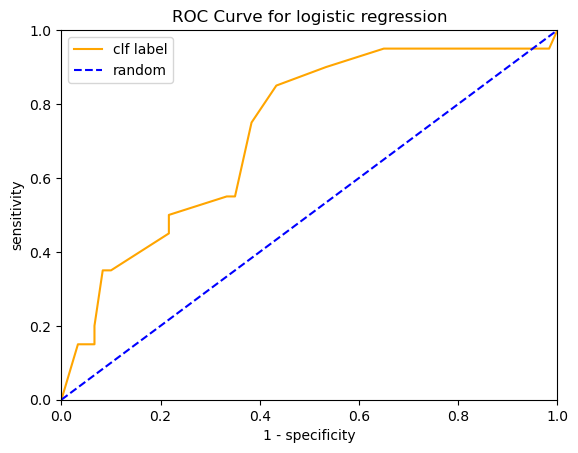

In [9]:
import matplotlib.pyplot as plt

line = np.arange(0, 1.05, 0.05)
plt.axis([0, 1, 0, 1])

plt.plot(fpr, tpr, color = 'orange', label = 'clf label')
plt.plot(line, line, color = 'blue', linestyle = '--', label = 'random')

plt.xlabel('1 - specificity')
plt.ylabel('sensitivity')
plt.title('ROC Curve for logistic regression')
plt.legend(loc = 'best');

